## Set tile distribution. The RA interval is based on the tile diameter projected on the sphere given a specific DEC. --06-29-2025
Find an issue that there is some overlap on the region from different tiles at larger RA and DEC, compared to the region with smaller RA and DEC region where the tiling scheme starts. It is probably due to the accumulation of error from different tiles.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import numpy as np
from astropy.table import Table
sys.path.append("/home/zjding/fiberassignment/algorithm")
from utils import get_fiberpos, xy2radec

In [19]:
def plot_positioners(tile_ra, tile_dec, fibers_center, patrol_radius_deg=0.213):
    positioner_ra, positioner_dec = xy2radec(tile_ra, tile_dec, fibers_center[:,0], fibers_center[:,1])
    plt.scatter(positioner_ra, positioner_dec, s=0.5, alpha=0.5)

In [4]:
fibers_center = get_fiberpos()
N_fibers = fibers_center.shape[0]
fiber_den = N_fibers/1.1    # assume FoV=1.1 deg^2
print(fiber_den)

2072.7272727272725


In [5]:
print(np.max(fibers_center, axis=0))
print(np.min(fibers_center, axis=0))

[270.4   279.207]
[-270.4   -279.206]


In [6]:
# ra_min, ra_max = 150.0, 200.0
# dec_min, dec_max = 20.0, 40.0
ra_min, ra_max = 150.0, 170.0
dec_min, dec_max = 0.0, 60.0

In [7]:
print(xy2radec(120.0, 0.0, np.array([-280.0, 280.0]), np.array([0.0, 0.0])))  # set 280 as the approximate tile radius
print(xy2radec(120.0, 40.0, np.array([-280.0, 280.0]), np.array([0.0, 0.0])))

(array([120.59656672, 119.40343328]), array([0., 0.]))
(array([120.77874273, 119.22125727]), array([39.99739405, 39.99739405]))


In [8]:
delta_dec = 0.8564

In [9]:
ra_list = []
dec_list = []
ra_start = ra_min
pre_factor = -1

for n_dec in range(60):
    dec = dec_min + delta_dec * n_dec
    ra_dia, dec_dia = xy2radec(ra_min, dec, np.array([-280.0, 280.0]), np.array([0.0, 0.0]))
    delta_ra = ra_dia[0] - ra_dia[1]
    pre_factor *= -1
    shift_factor = pre_factor *delta_ra/2.0
    ra_start += shift_factor
    ra_center = np.arange(ra_start, ra_max, delta_ra, dtype=np.float64)
    dec_center = np.ones(len(ra_center)) * dec
    
    ra_list.append(ra_center)
    dec_list.append(dec_center)

In [10]:
ra_array = np.array([item for sublist in ra_list for item in sublist])
dec_array = np.array([item for sublist in dec_list for item in sublist])

## save tile info

In [11]:
ntiles = len(ra_array)
tiles = Table()
tiles['TILEID'] = np.arange(ntiles, dtype='i4')
tiles['RA'] = ra_array
tiles['DEC'] = dec_array

tiles.write('./tiles.fits', format='fits', overwrite=True)

In [12]:
tiles_info = Table.read('./tiles.fits')
tiles_info

TILEID,RA,DEC
int32,float64,float64
0,150.59656672250665,0.0
1,151.78970016751995,0.0
2,152.98283361253326,0.0
3,154.17596705754656,0.0
4,155.36910050255986,0.0
5,156.56223394757316,0.0
6,157.75536739258646,0.0
7,158.94850083759977,0.0
8,160.14163428261307,0.0


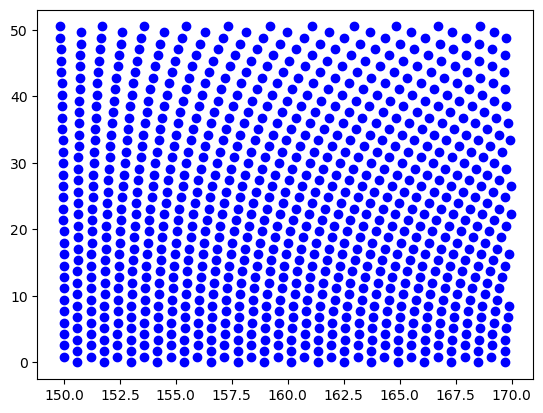

In [13]:
fig, ax = plt.subplots(dpi=100)
# ax.plot(tiles_Ax.flatten(), tiles_Ay.flatten(), 'o', color='blue')
# ax.plot(tiles_Bx.flatten(), tiles_By.flatten(), 'o', color='black')
ax.plot(tiles_info['RA'], tiles_info['DEC'], 'o', color='blue')

Text(0, 0.5, 'DEC [deg]')

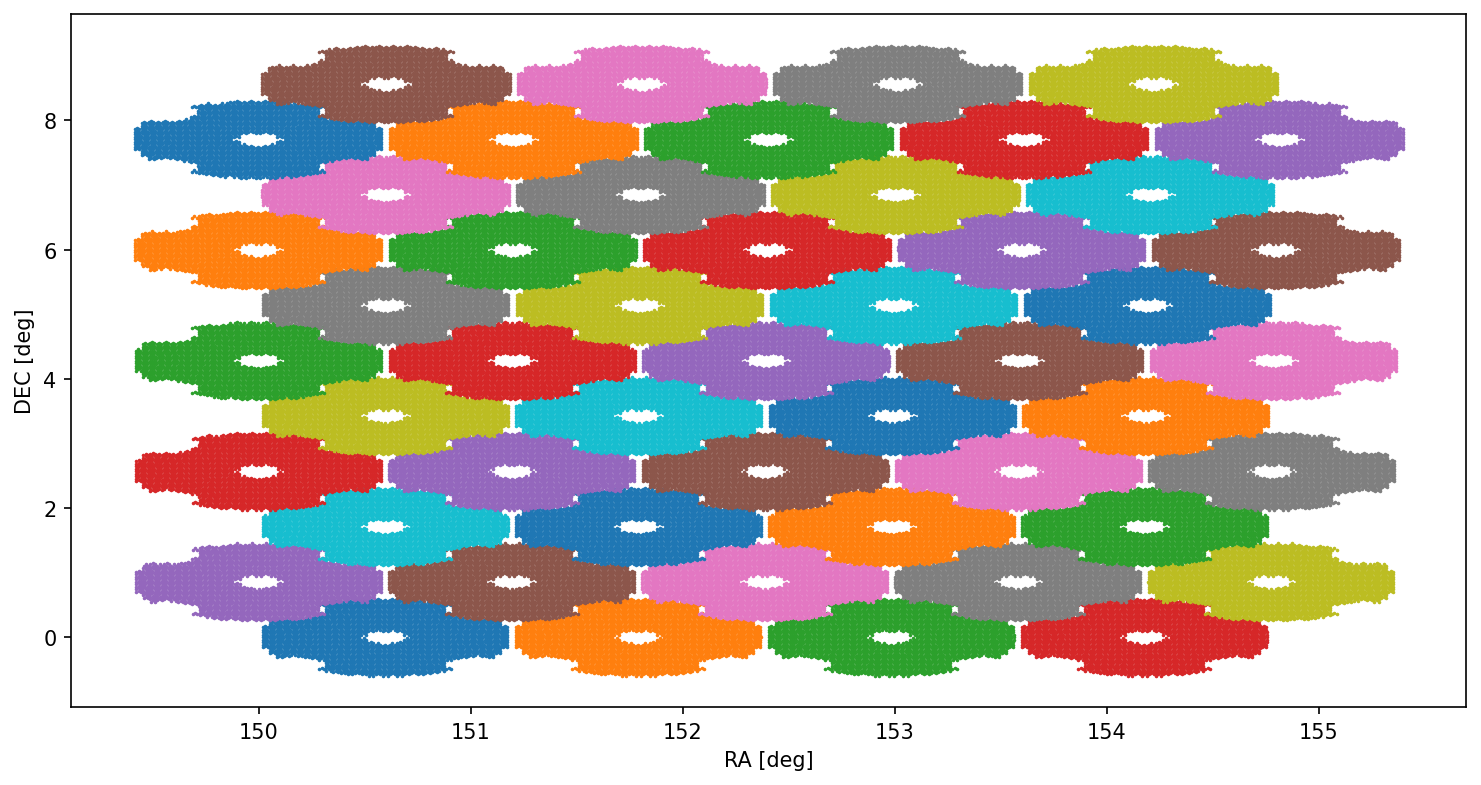

In [14]:
#mask = (tiles['DEC']>55.0)&(tiles['RA']<155.0)
mask = (tiles_info['DEC']<9.0)&(tiles_info['RA']<155.0)

sub_tiles = tiles_info[mask]

plt.figure(figsize=(12, 6), dpi=150)
for i in range(len(sub_tiles)):

    plot_positioners(sub_tiles[i]['RA'], sub_tiles[i]['DEC'], fibers_center)
      
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

Text(0, 0.5, 'DEC [deg]')

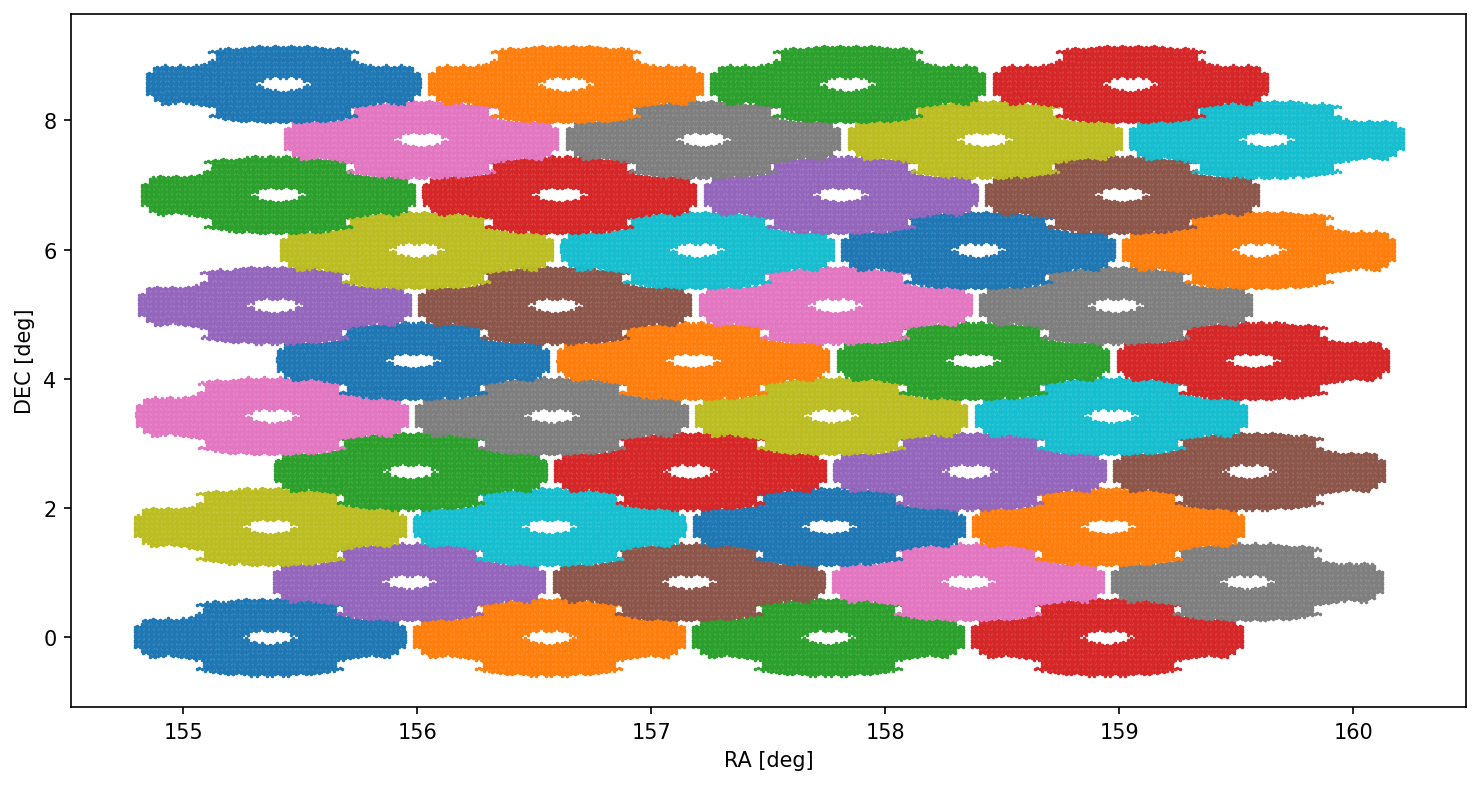

In [15]:
mask = (tiles_info['DEC']<9.0)&(tiles_info['RA']>155.0)&(tiles_info['RA']<160.0)

sub_tiles = tiles_info[mask]

plt.figure(figsize=(12, 6), dpi=150)
for i in range(len(sub_tiles)):

    plot_positioners(sub_tiles[i]['RA'], sub_tiles[i]['DEC'], fibers_center)
      
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

Text(0, 0.5, 'DEC [deg]')

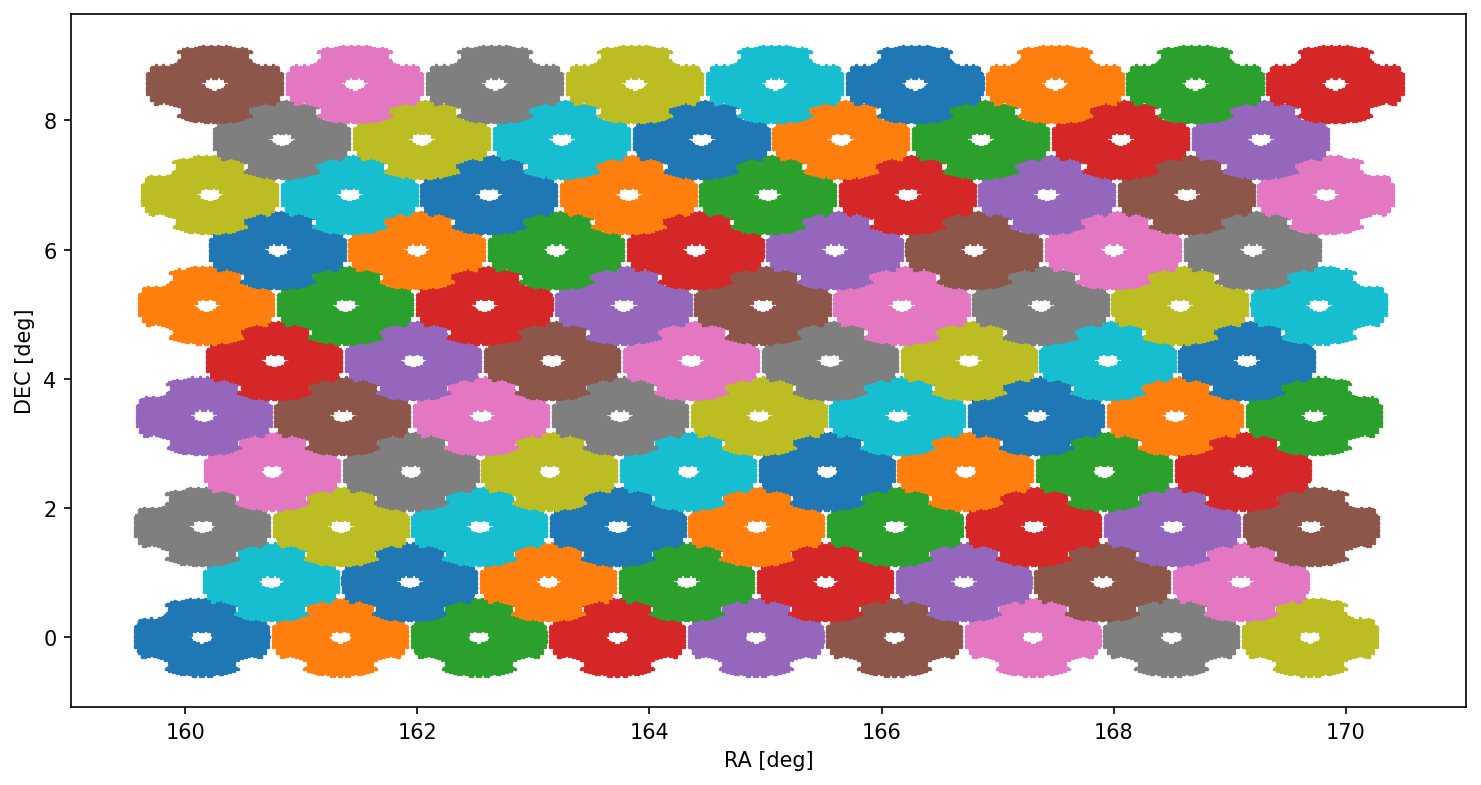

In [16]:
mask = (tiles_info['DEC']<9.0)&(tiles_info['RA']>160.0)&(tiles_info['RA']<170.0)

sub_tiles = tiles_info[mask]

plt.figure(figsize=(12, 6), dpi=150)
for i in range(len(sub_tiles)):

    plot_positioners(sub_tiles[i]['RA'], sub_tiles[i]['DEC'], fibers_center)
      
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

Text(0, 0.5, 'DEC [deg]')

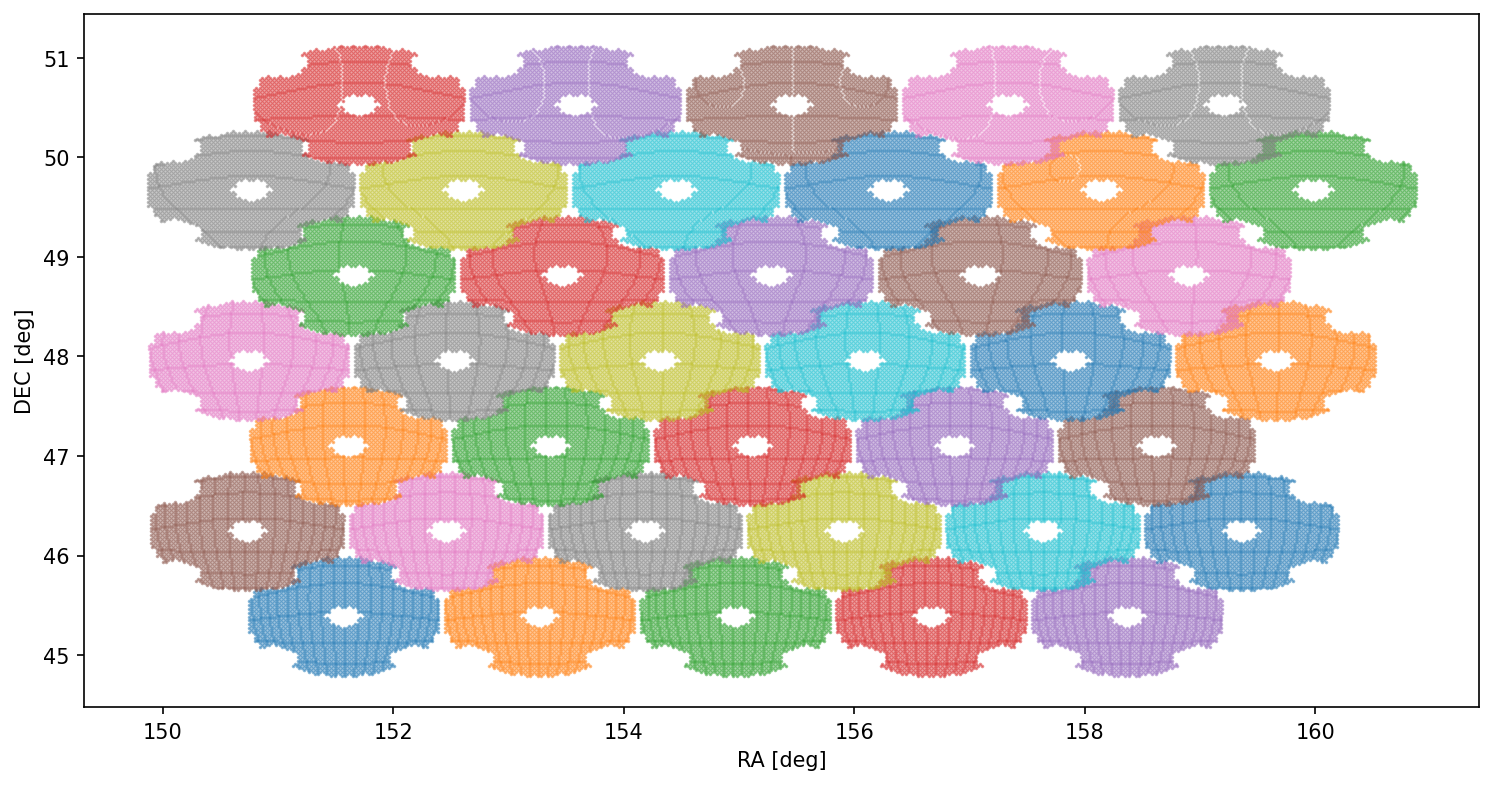

In [20]:
#mask = (tiles['DEC']<23.0)&(tiles['RA']>170.0)&(tiles_info['RA']<180.0)
mask = (tiles['DEC']>45.0)&(tiles['RA']>150.0)&(tiles_info['RA']<160.0)
#mask = (tiles_info['DEC']<23.0)
sub_tiles = tiles_info[mask]

plt.figure(figsize=(12, 6), dpi=150)
for i in range(len(sub_tiles)):

    plot_positioners(sub_tiles[i]['RA'], sub_tiles[i]['DEC'], fibers_center)
      
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

Text(0, 0.5, 'DEC [deg]')

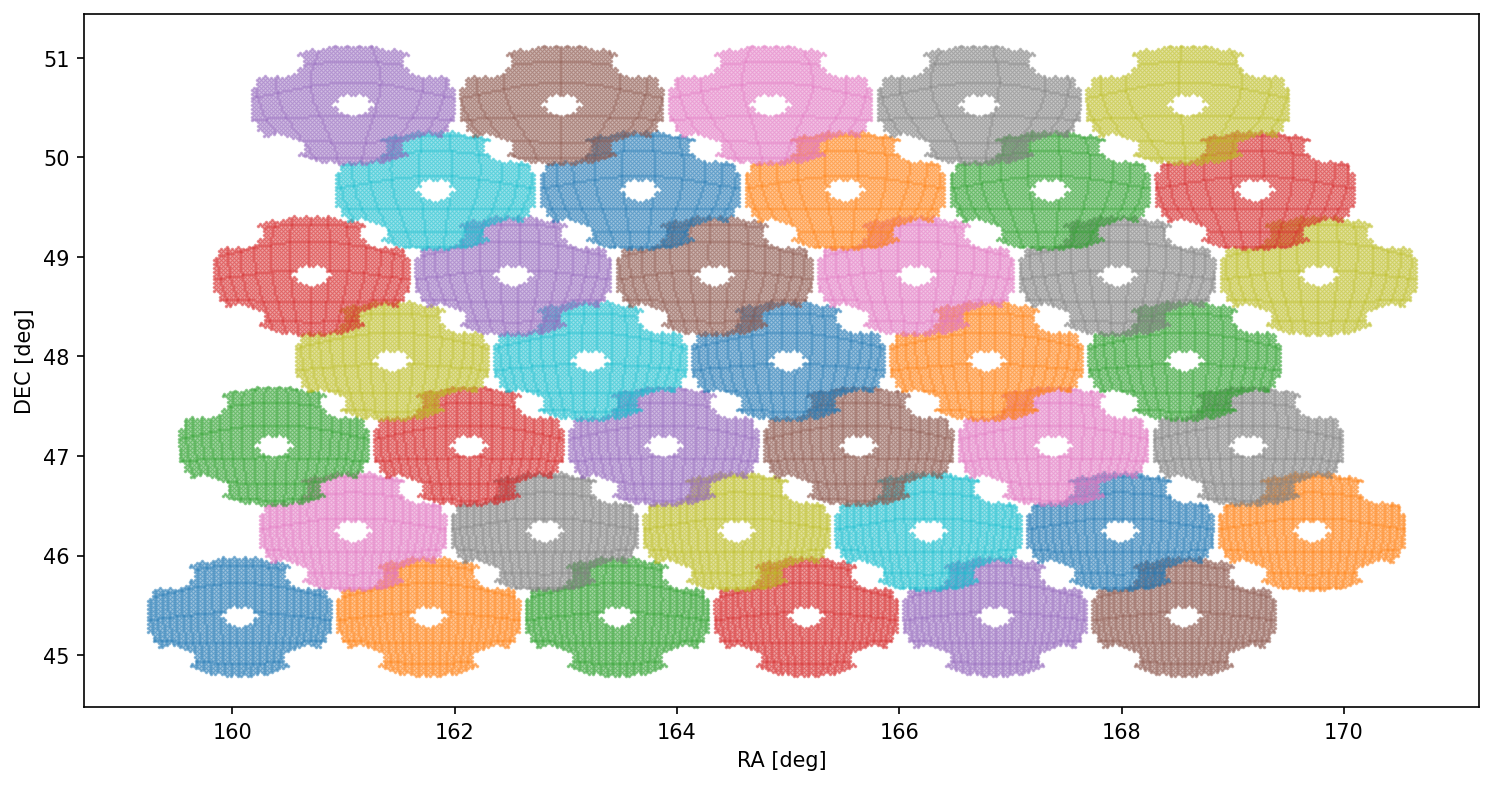

In [21]:
#mask = (tiles['DEC']<23.0)&(tiles['RA']>170.0)&(tiles_info['RA']<180.0)
mask = (tiles['DEC']>45.0)&(tiles['RA']>160.0)&(tiles_info['RA']<170.0)
#mask = (tiles_info['DEC']<23.0)
sub_tiles = tiles_info[mask]

plt.figure(figsize=(12, 6), dpi=150)
for i in range(len(sub_tiles)):

    plot_positioners(sub_tiles[i]['RA'], sub_tiles[i]['DEC'], fibers_center)
      
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")